# Phishing URL Detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI For Cybersec/dataset_phishing.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
data.rename(columns={'status': 'labels'}, inplace=True)

In [ ]:
data.drop(columns=['url'], inplace=True)
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,labels
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['labels'] = label_encoder.fit_transform(data['labels'])
data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,labels
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,0


1: Phishing, 0: Legitimate

In [ ]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,labels
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0000

In [ ]:
data.drop(columns=['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'submit_email', 'sfh', 'ratio_intErrors'], inplace=True)

# Balanced/Imbalanced Data

The data is perfectly balanced. We have 5715 Legitimate websites and 5715 Phishing websites in our dataset.

In [ ]:
data['labels'].value_counts()

,count
labels,
0,5715
1,5715


<Axes: xlabel='labels'>

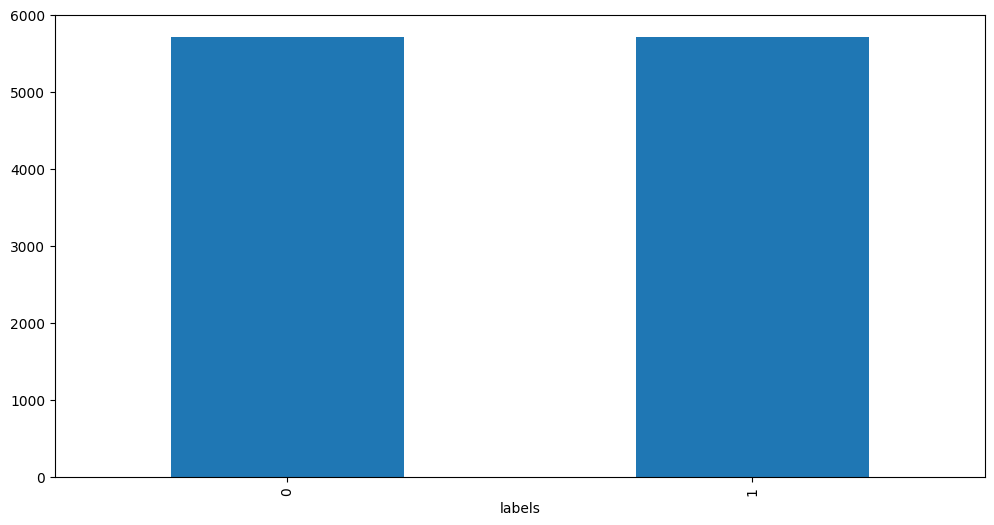

In [ ]:
data['labels'].value_counts().plot(kind='bar')

# Correlation

In [ ]:
def p_corr_heatmap(data, idx_s, idx_e):
    temp = data.iloc[:, idx_s:idx_e]
    temp['labels'] = data['labels']
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

# First 20 Columns

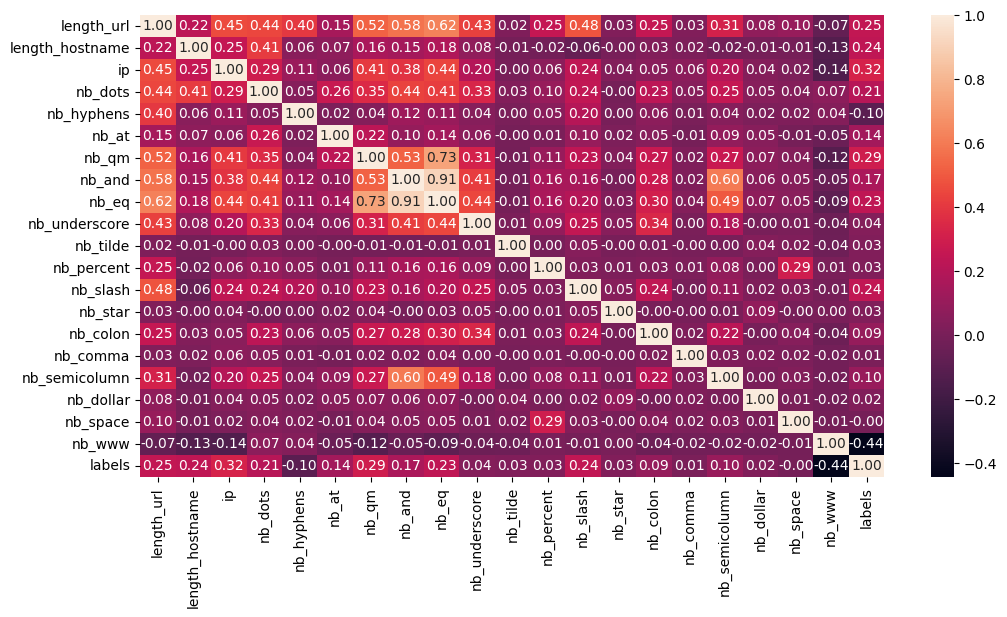

In [ ]:
p_corr_heatmap(data, 0, 20)

# Columns 21 to 40


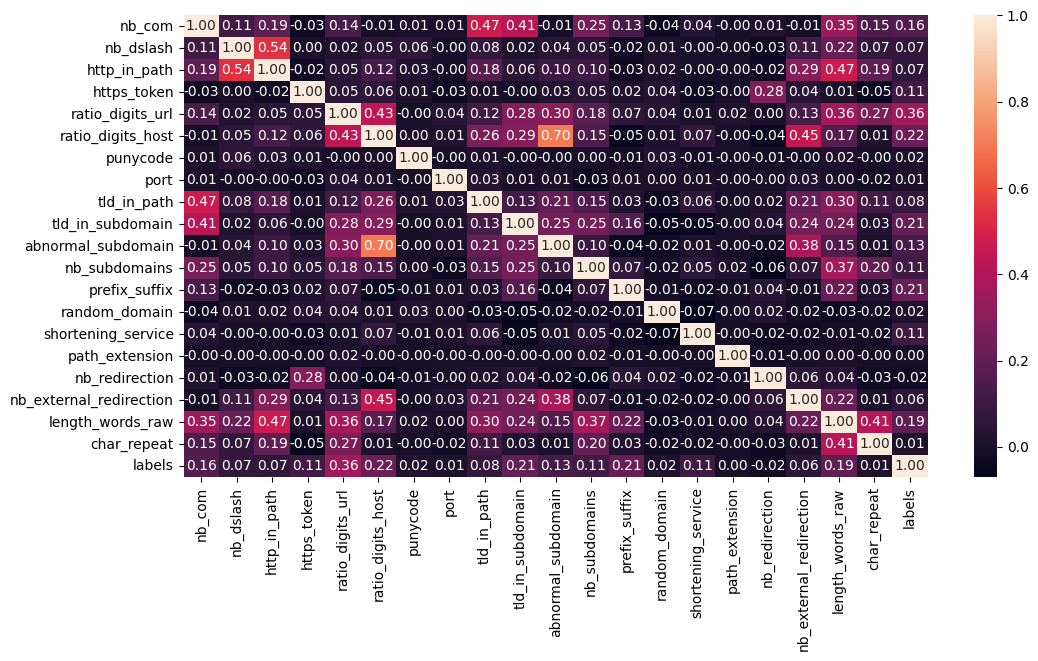

In [ ]:
p_corr_heatmap(data, 20, 40)

# Columns 41 to 60



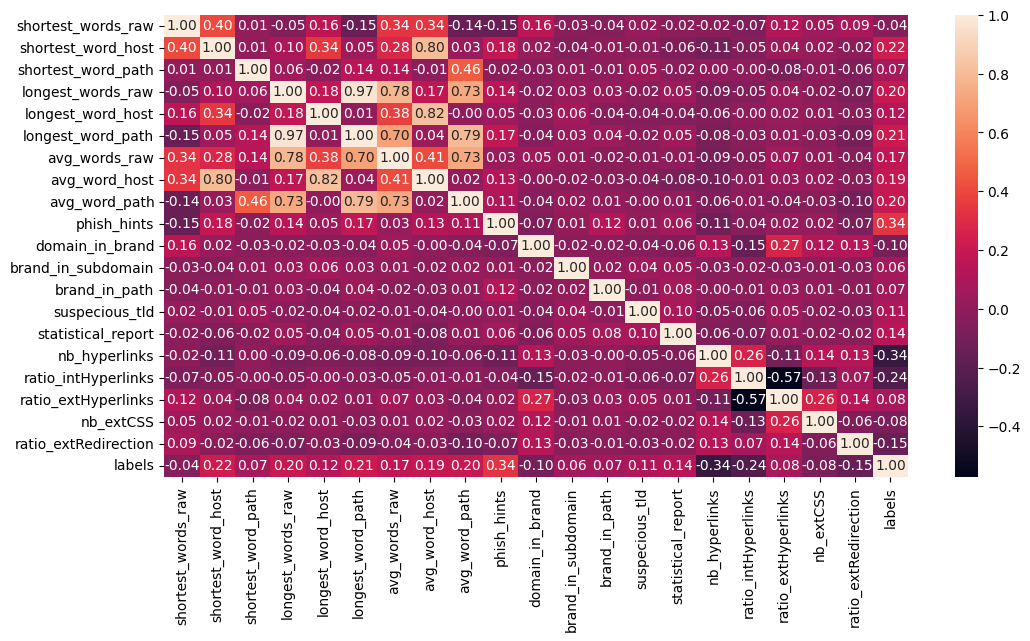

In [ ]:
p_corr_heatmap(data, 40, 60)

# Columns 60 onwards

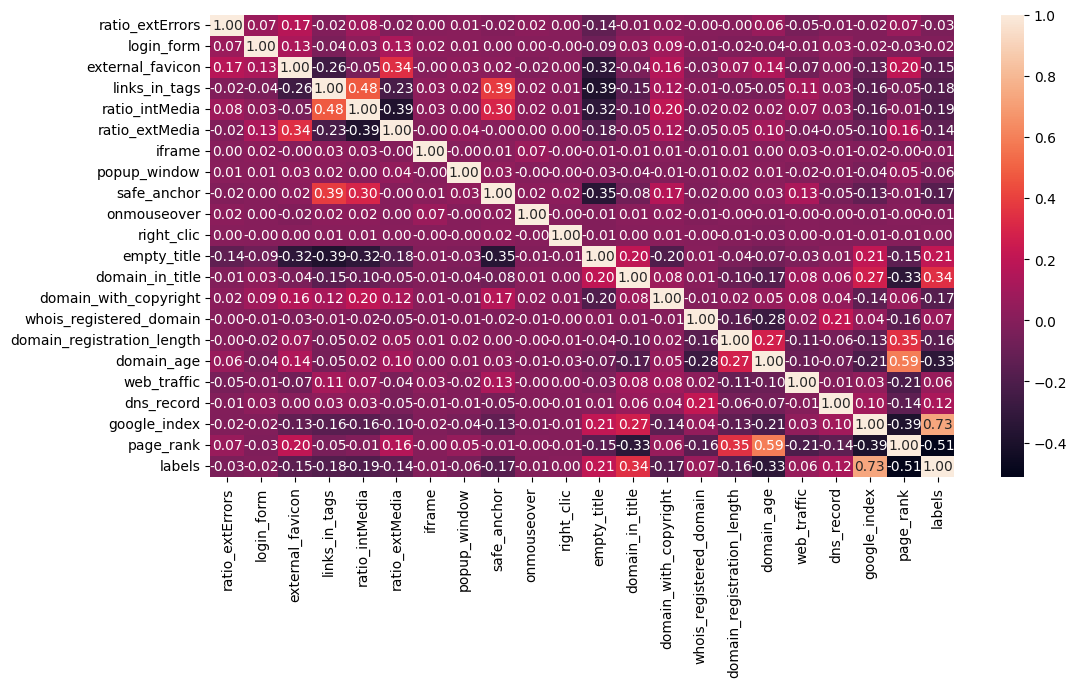

In [ ]:
p_corr_heatmap(data, 60, 81)

# Correlation score in a table for all features

In [ ]:
def compute_correlation(data):
    correlations = {}

    for col in data.columns:
        if col != 'labels':
            correlations[col] = data[col].corr(data['labels'])

    corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
    corr_df = corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

    return corr_df

correlation_df = compute_correlation(data)
correlation_df


,Feature,Correlation
0,google_index,0.731171
1,ratio_digits_url,0.356395
2,domain_in_title,0.342807
3,phish_hints,0.335393
4,ip,0.321698
...,...,...
76,ratio_intHyperlinks,-0.243982
77,domain_age,-0.331889
78,nb_hyperlinks,-0.342628
79,nb_www,-0.443468


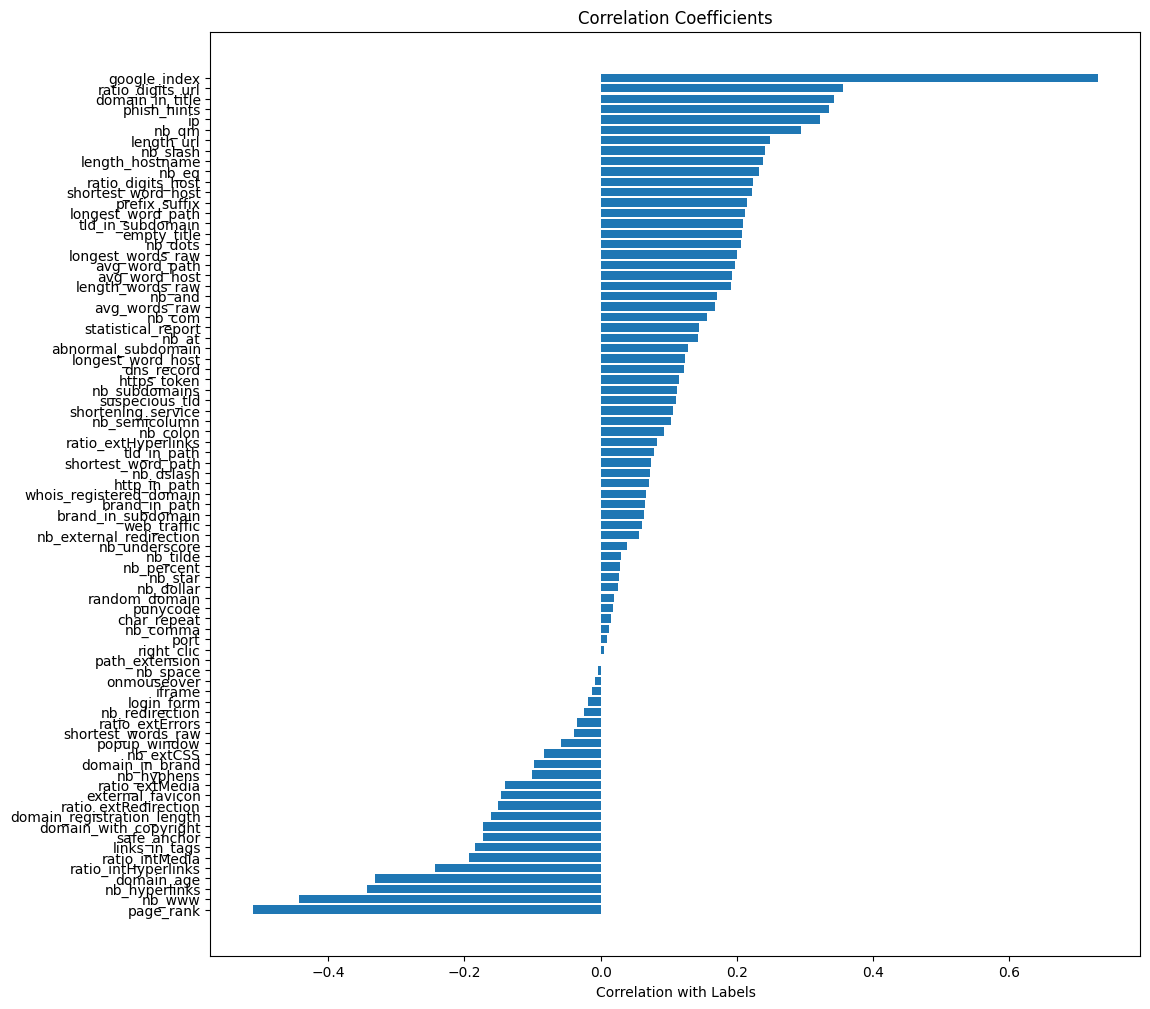

In [ ]:
def plot_corr(correlation_df):
    scores = correlation_df.set_index('Feature')['Correlation']
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Correlation Coefficients")
    plt.xlabel("Correlation with Labels")

plt.figure(dpi=100, figsize=(12, 12))
plot_corr(correlation_df)
plt.show()


# Absolute Values of Correlation

In [ ]:
def compute_abs_correlation(data):
    correlations = {}

    for col in data.columns:
        if col != 'labels':
            correlations[col] = data[col].corr(data['labels'])
            correlations[col] = abs(correlations[col])

    corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
    corr_df = corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

    return corr_df

pd.options.display.float_format = '{:.6f}'.format
correlation_df = compute_abs_correlation(data)
correlation_df


,Feature,Correlation
0,google_index,0.731171
1,page_rank,0.511137
2,nb_www,0.443468
3,ratio_digits_url,0.356395
4,domain_in_title,0.342807
...,...,...
76,port,0.009011
77,onmouseover,0.007787
78,right_clic,0.004680
79,nb_space,0.004193


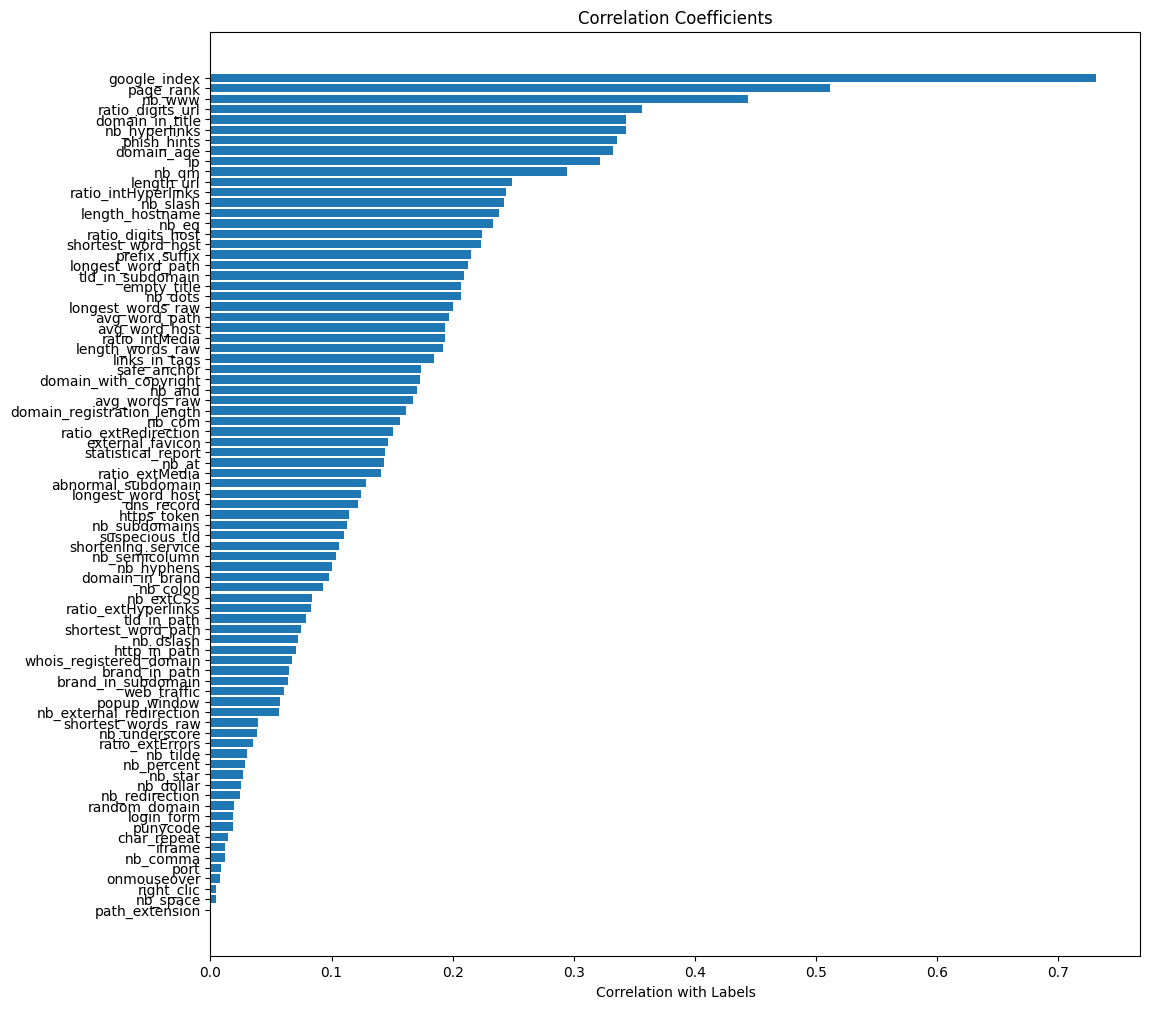

In [ ]:
plt.figure(dpi=100, figsize=(12, 12))
plot_corr(correlation_df)
plt.show()

# Prediction using multiple ML Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Training the Logistic Regression Model

In [ ]:
def train_logistic(data, top_n):
    top_n_features = correlation_df['Feature'][:top_n]
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    lr = LogisticRegression()

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy


The loop will start with 30 features, and we'll train the model using the top 30 features. It will then gradually include up to 81 features to determine the optimal number of features for this problem.

In [ ]:
arr = []
for i in range(30,81,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance with Top 30 features is precision : 0.9376103590347263, recall : 0.9387153800824986, f1 score : 0.9381625441696113, accuracy : 0.9387576552930884
Performance with Top 31 features is precision : 0.9387153800824986, recall : 0.9387153800824986, f1 score : 0.9387153800824986, accuracy : 0.9393409157188685
Performance with Top 32 features is precision : 0.9370958259847149, recall : 0.939304655274013, f1 score : 0.9381989405532666, accuracy : 0.9387576552930884
Performance with Top 33 features is precision : 0.9354460093896714, recall : 0.939304655274013, f1 score : 0.9373713613643047, accuracy : 0.9378827646544182
Performance with Top 34 features is precision : 0.9354838709677419, recall : 0.9398939304655274, f1 score : 0.9376837154614932, accuracy : 0.9381743948673082
Performance with Top 35 features is precision : 0.937206572769953, recall : 0.9410724808485563, f1 score : 0.9391355483681271, accuracy : 0.9396325459317585
Performance with Top 36 features is precision : 0.93713

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,30,0.937610,0.938715,0.938163,0.938758
1,31,0.938715,0.938715,0.938715,0.939341
2,32,0.937096,0.939305,0.938199,0.938758
3,33,0.935446,0.939305,0.937371,0.937883
4,34,0.935484,0.939894,0.937684,0.938174
5,35,0.937207,0.941072,0.939136,0.939633
6,36,0.937133,0.939894,0.938511,0.939049
7,37,0.937610,0.938715,0.938163,0.938758
8,38,0.938235,0.939894,0.939064,0.939633
9,39,0.939894,0.939894,0.939894,0.940507


<Axes: xlabel='num_of_features', ylabel='precision'>

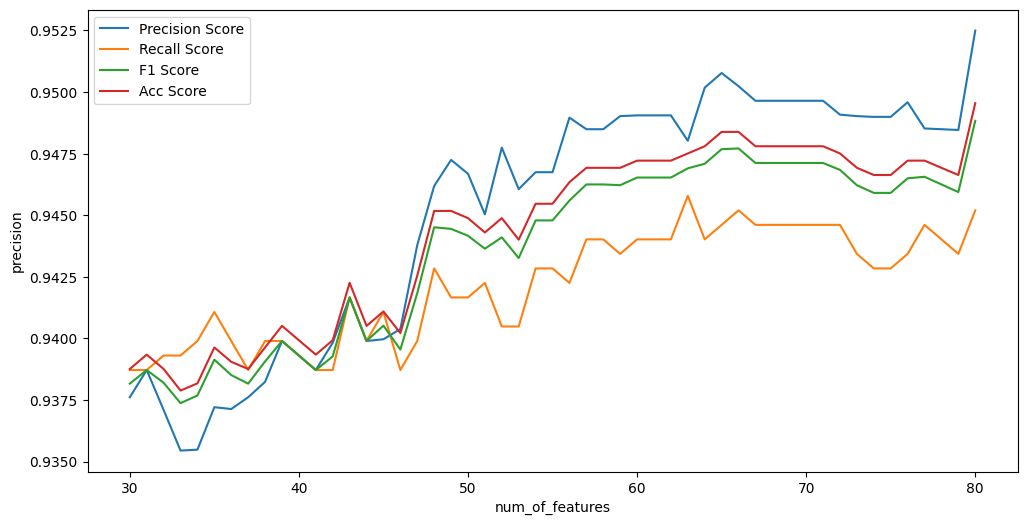

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [ ]:
best_feature_count = df.loc[df['recall'].idxmax(), 'num_of_features']
print("Optimal number of features based on Recall score:", best_feature_count)

Optimal number of features based on Recall score: 63


In [ ]:
best_feature_count = df.loc[df['precision'].idxmax(), 'num_of_features']
print("Optimal number of features based on Precision score:", best_feature_count)

Optimal number of features based on Precision score: 80


In [ ]:
best_feature_count = df.loc[df['f1_score'].idxmax(), 'num_of_features']
print("Optimal number of features based on F1 score:", best_feature_count)

Optimal number of features based on F1 score: 80


In [ ]:
best_feature_count = df.loc[df['accuracy'].idxmax(), 'num_of_features']
print("Optimal number of features based on Accuracy score:", best_feature_count)

Optimal number of features based on Accuracy score: 80


In [ ]:
df[df['num_of_features']==63]

,num_of_features,precision,recall,f1_score,accuracy
33,63,0.948021,0.945787,0.946903,0.947507


In [ ]:
df[df['num_of_features']==80]

,num_of_features,precision,recall,f1_score,accuracy
50,80,0.952494,0.945197,0.948832,0.949548


# Training the Random Forest Classifier Model


In [ ]:
def train_random_forest(data, top_n):
    top_n_features = correlation_df['Feature'][:top_n]
    X = data[top_n_features]
    y = data['labels']

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=True, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

In [ ]:
arr2 = []
for i in range(30,81,1):
    precision, recall, f1, accuracy = train_random_forest(data, i)
    print("Performance with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr2.append([i, precision, recall, f1, accuracy])

Performance with Top 30 features is precision : 0.9581614614024749, recall : 0.9581614614024749, f1 score : 0.9581614614024749, accuracy : 0.9585885097696122
Performance with Top 31 features is precision : 0.9597633136094674, recall : 0.9558043606364172, f1 score : 0.9577797460879834, accuracy : 0.958296879556722
Performance with Top 32 features is precision : 0.9587264150943396, recall : 0.9581614614024749, f1 score : 0.9584438549955792, accuracy : 0.9588801399825022
Performance with Top 33 features is precision : 0.9604952830188679, recall : 0.9599292869770183, f1 score : 0.9602122015915119, accuracy : 0.9606299212598425
Performance with Top 34 features is precision : 0.9560632688927944, recall : 0.9616971125515615, f1 score : 0.9588719153936546, accuracy : 0.9591717701953922
Performance with Top 35 features is precision : 0.9558043606364172, recall : 0.9558043606364172, f1 score : 0.9558043606364172, accuracy : 0.9562554680664916
Performance with Top 36 features is precision : 0.958

In [ ]:
df_rf = pd.DataFrame(arr2, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df_rf

,num_of_features,precision,recall,f1_score,accuracy
0,30,0.958161,0.958161,0.958161,0.958589
1,31,0.959763,0.955804,0.957780,0.958297
2,32,0.958726,0.958161,0.958444,0.958880
3,33,0.960495,0.959929,0.960212,0.960630
4,34,0.956063,0.961697,0.958872,0.959172
5,35,0.955804,0.955804,0.955804,0.956255
6,36,0.958678,0.956983,0.957830,0.958297
7,37,0.959858,0.958161,0.959009,0.959463
8,38,0.957597,0.958161,0.957879,0.958297
9,39,0.959929,0.959929,0.959929,0.960338


<Axes: xlabel='num_of_features', ylabel='precision'>

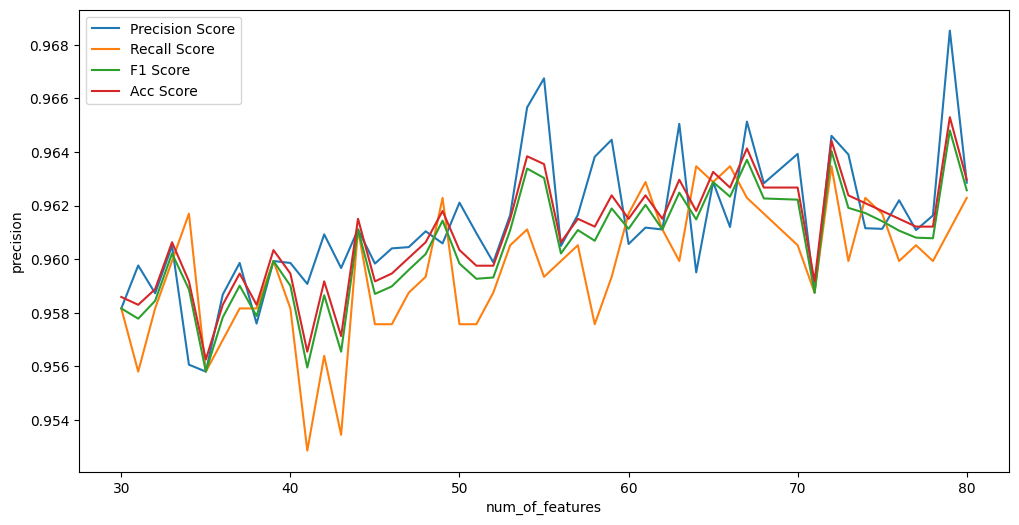

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df_rf, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df_rf, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df_rf, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df_rf, label='Acc Score')

In [ ]:
best_feature_count = df_rf.loc[df_rf['recall'].idxmax(), 'num_of_features']
print("Optimal number of features based on Recall score:", best_feature_count)

Optimal number of features based on Recall score: 64


In [ ]:
best_feature_count = df_rf.loc[df_rf['precision'].idxmax(), 'num_of_features']
print("Optimal number of features based on Precision score:", best_feature_count)

Optimal number of features based on Precision score: 79


In [ ]:
best_feature_count = df_rf.loc[df_rf['f1_score'].idxmax(), 'num_of_features']
print("Optimal number of features based on F1 score:", best_feature_count)

Optimal number of features based on F1 score: 79


In [ ]:
best_feature_count = df_rf.loc[df_rf['accuracy'].idxmax(), 'num_of_features']
print("Optimal number of features based on Accuracy score:", best_feature_count)

Optimal number of features based on Accuracy score: 79


In [ ]:
print(df_rf[df_rf['num_of_features']==64])
print(df_rf[df_rf['num_of_features']==79])

    num_of_features  precision   recall  f1_score  accuracy
34               64   0.959507 0.963465  0.961482  0.961796
    num_of_features  precision   recall  f1_score  accuracy
49               79   0.968527 0.961108  0.964803  0.965296


In [ ]:
df_rf[df_rf['num_of_features']==64]

,num_of_features,precision,recall,f1_score,accuracy
34,64,0.959507,0.963465,0.961482,0.961796


In [ ]:
df_rf[df_rf['num_of_features']==79]

,num_of_features,precision,recall,f1_score,accuracy
49,79,0.968527,0.961108,0.964803,0.965296


# Random Forest outperforms Logistic Regression, so we trained it on the top 79 features

In [ ]:
top_n = 79
top_n_features = correlation_df['Feature'][:top_n]

X = data[top_n_features]
y = data['labels']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
confusion_matrix(y_test, y_pred)

Precision:  0.9685273159144893
Recall:  0.9611078373600471
F1 Score:  0.9648033126293996
Accuracy:  0.9652960046660835


array([[1679,   53],
       [  66, 1631]])

In [ ]:
legitimate_row = X_val[y_val == 0].sample(n=1, random_state=None).iloc[0]
phishing_row = X_val[y_val == 1].sample(n=1, random_state=None).iloc[0]

legitimate_row_features = legitimate_row[top_n_features].values.reshape(1, -1)
phishing_row_features = phishing_row[top_n_features].values.reshape(1, -1)

legitimate_row_df = pd.DataFrame(legitimate_row_features, columns=top_n_features)
phishing_row_df = pd.DataFrame(phishing_row_features, columns=top_n_features)

legitimate_row_df

Feature,google_index,page_rank,nb_www,ratio_digits_url,domain_in_title,nb_hyperlinks,phish_hints,domain_age,ip,nb_qm,length_url,ratio_intHyperlinks,nb_slash,length_hostname,nb_eq,ratio_digits_host,shortest_word_host,prefix_suffix,longest_word_path,tld_in_subdomain,empty_title,nb_dots,longest_words_raw,avg_word_path,avg_word_host,ratio_intMedia,length_words_raw,links_in_tags,safe_anchor,domain_with_copyright,nb_and,avg_words_raw,domain_registration_length,nb_com,ratio_extRedirection,external_favicon,statistical_report,nb_at,ratio_extMedia,abnormal_subdomain,longest_word_host,dns_record,https_token,nb_subdomains,suspecious_tld,shortening_service,nb_semicolumn,nb_hyphens,domain_in_brand,nb_colon,nb_extCSS,ratio_extHyperlinks,tld_in_path,shortest_word_path,nb_dslash,http_in_path,whois_registered_domain,brand_in_path,brand_in_subdomain,web_traffic,popup_window,nb_external_redirection,shortest_words_raw,nb_underscore,ratio_extErrors,nb_tilde,nb_percent,nb_star,nb_dollar,nb_redirection,random_domain,login_form,punycode,char_repeat,iframe,nb_comma,port,onmouseover,right_clic
0,0.000000,2.000000,1.000000,0.000000,1.000000,56.000000,0.000000,3975.000000,0.000000,0.000000,28.000000,0.500000,3.000000,19.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,0.000000,7.000000,0.000000,2.000000,41.176471,83.333333,1.000000,0.000000,7.000000,42.000000,0.000000,0.035714,1.000000,0.000000,0.000000,100.000000,0.000000,11.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2367247.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
phishing_row_df

Feature,google_index,page_rank,nb_www,ratio_digits_url,domain_in_title,nb_hyperlinks,phish_hints,domain_age,ip,nb_qm,length_url,ratio_intHyperlinks,nb_slash,length_hostname,nb_eq,ratio_digits_host,shortest_word_host,prefix_suffix,longest_word_path,tld_in_subdomain,empty_title,nb_dots,longest_words_raw,avg_word_path,avg_word_host,ratio_intMedia,length_words_raw,links_in_tags,safe_anchor,domain_with_copyright,nb_and,avg_words_raw,domain_registration_length,nb_com,ratio_extRedirection,external_favicon,statistical_report,nb_at,ratio_extMedia,abnormal_subdomain,longest_word_host,dns_record,https_token,nb_subdomains,suspecious_tld,shortening_service,nb_semicolumn,nb_hyphens,domain_in_brand,nb_colon,nb_extCSS,ratio_extHyperlinks,tld_in_path,shortest_word_path,nb_dslash,http_in_path,whois_registered_domain,brand_in_path,brand_in_subdomain,web_traffic,popup_window,nb_external_redirection,shortest_words_raw,nb_underscore,ratio_extErrors,nb_tilde,nb_percent,nb_star,nb_dollar,nb_redirection,random_domain,login_form,punycode,char_repeat,iframe,nb_comma,port,onmouseover,right_clic
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3934.000000,0.000000,1.000000,39.000000,0.000000,4.000000,23.000000,0.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,1.000000,16.000000,3.000000,9.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
legitimate_row_scaled = scaler.transform(legitimate_row_df)
phishing_row_scaled = scaler.transform(phishing_row_df)

legitimate_prediction = rf.predict(legitimate_row_scaled)
phishing_prediction = rf.predict(phishing_row_scaled)

print("Legitimate Website Prediction: ", legitimate_prediction[0], " | Actual Label: 0")
print("Phishing Website Prediction: ", phishing_prediction[0], " | Actual Label: 1")

Legitimate Website Prediction:  0  | Actual Label: 0
Phishing Website Prediction:  1  | Actual Label: 1
